Let's work with a fairly  complicated data to understand the nuances of Data preparation. This data is quite challenging to clean and you may not agree with my approach.
Note following points:-
    - I have not used the best of Python coding as I am new to Python. My approach was quite functional; check if the output is providing the answer or not.
    - There are many approaches to data cleaning (treatment of missing values and outliers). Consider this approach as one of the many possible.
    - The approach adopted is more connected to Analytics rather than Machine Learning. Hence, treatment is  'manual'!! You may notice that each of the variables are not treated in so much detail by ML professionals.

**Introduction**:- Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. The objective is  to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\cleaning beginner\EDA Tutorial on Data Cleaning\cs-training.csv")

In [3]:
df.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Note that some of the variables got missing values indicated by 'NaN'. But this is not reliable and we need a summary statistics. Let's take a look at list of variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


The list of variables indicates that all variables are numeric and few of these got missing values. We will look at the summary of these variables.

In [8]:
df.rename(columns = {df.columns[0]:'ID'}, inplace = True) 

df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


The depdendent variable is 'SeriousDlqin2yrs'. There are also variables like 'NumberOfTime30_59DaysPastDueNotW',	'NumberOfTime60_89DaysPastDueNotW',	'NumberOfTimes90DaysLate'. These variables give info on how much customers were delayed in payment and frequency. In Financial Industry, these types of variables are the inputs for creating the dependent variable. Hence, these variables cannot be used as independent variables.

Moreover, the use of this model is to score a new customer and obviously these variables will not
be  available for a new customer. Hence, let's remove these variables straight away.

In [9]:
df.drop(df.columns[[4, 8, 10]], axis=1, inplace=True)
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45,0.802982,9120.0,13,6,2.0
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0
3,4,0,0.233810,30,0.036050,3300.0,5,0,0.0
4,5,0,0.907239,49,0.024926,63588.0,7,1,0.0


In [10]:
P = df.groupby('SeriousDlqin2yrs')['ID'].count().reset_index()

P['Percentage'] = 100 * P['ID']  / P['ID'].sum()

print(P)

   SeriousDlqin2yrs      ID  Percentage
0                 0  139974      93.316
1                 1   10026       6.684


Freq table shows that there are no missing values and as expected it contains 0 and 1.
Delinquents are 6.68%

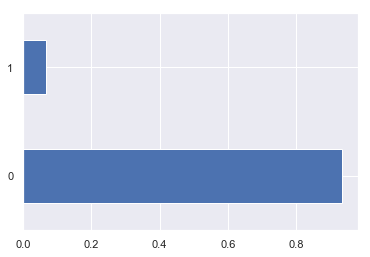

In [11]:
df['SeriousDlqin2yrs'].value_counts(normalize=True).plot(kind='barh')

## RevolvingUtilizationOfUnsecuredLines

In [12]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

there are no missing values. the lower value of 0 is fine but max value is ridiculous as it is rarley more than 1

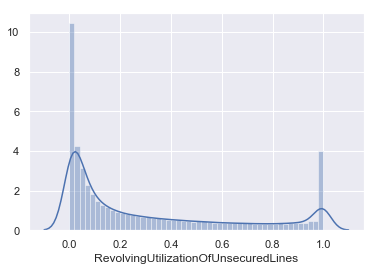

In [13]:
df3=df.loc[df['RevolvingUtilizationOfUnsecuredLines'] <=1]
sns.distplot(df3['RevolvingUtilizationOfUnsecuredLines'])

In [14]:
len(df[(df['RevolvingUtilizationOfUnsecuredLines']>1)])

3321

this shows that about 3300 observations got values more than 1 and hence it 
is not appropriate to consider all these as outliers and cap to 1. A better approach is to 
make these missing and impute the values

In [15]:
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].map(lambda x: np.NaN if x >1 else x)

In [16]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    146679.000000
mean          0.303782
std           0.337892
min           0.000000
25%           0.028608
50%           0.144476
75%           0.519980
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

For imputation, we will use ffill method which will retain the distribution and mean of the variable.

In [17]:
df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill', inplace=True)

In [18]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

## age 

Let's take a look at univariate analysis and distribution.

In [19]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

there are no missing values. the lower value of 0 and max value of 109 are outliers.
Typical age range is 18-80. 

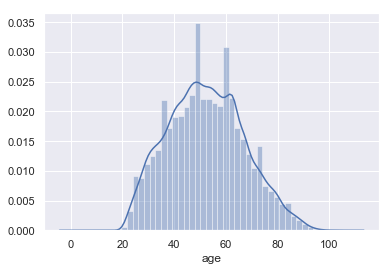

In [20]:
sns.distplot(df['age'])

this shows that about there are only very few observations outside 18-80 range.
Hence, it is ok to cap the values

In [ ]:
df.loc[df['age']>80, 'age']=80
df.loc[df['age']<18, 'age']=18

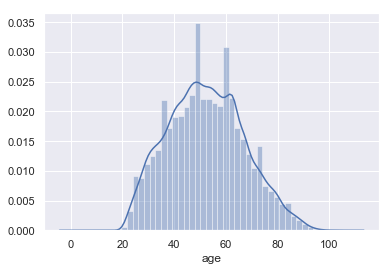

In [21]:
sns.distplot(df['age'])

In [22]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

## DebtRatio

In [23]:
df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

This variable refers to debt to income ratio.there are no missing values. the lower value of 0 is fine but max value is ridiculous as it is rarley more than

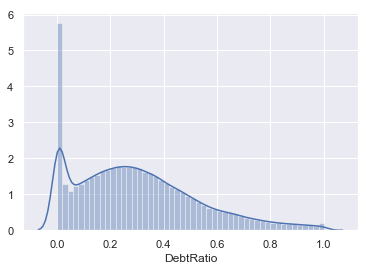

In [24]:
df2=df[df['DebtRatio']<=1]
sns.distplot(df2['DebtRatio'])

In [25]:
df2=df[df['DebtRatio']>1]
df2['DebtRatio'].describe()

count     35137.000000
mean       1505.989566
std        3999.026847
min           1.000500
25%          42.000000
50%         907.000000
75%        2210.000000
max      329664.000000
Name: DebtRatio, dtype: float64

Typical value of Debt Income ratio is 0.4. But almost 35000 observations got values
	higher than 1 and hence cannot be treated as outliers. Best approach is to consider
	it as missing and impute values

In [26]:
df.loc[df['DebtRatio']>1, 'DebtRatio']=np.NaN

In [27]:
df['DebtRatio'].describe()

count    114863.000000
mean          0.303022
std           0.226287
min           0.000000
25%           0.125981
50%           0.274505
75%           0.438098
max           1.000000
Name: DebtRatio, dtype: float64

In [28]:
df['DebtRatio'].fillna(method='ffill', inplace=True)

In [29]:
df['DebtRatio'].describe()

count    150000.000000
mean          0.303109
std           0.226290
min           0.000000
25%           0.126122
50%           0.274252
75%           0.438325
max           1.000000
Name: DebtRatio, dtype: float64

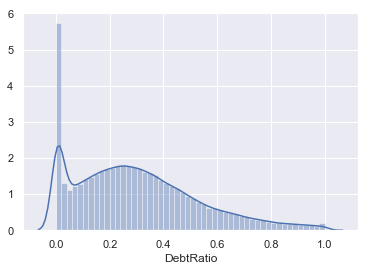

In [30]:
sns.distplot(df['DebtRatio'])

## NumberOfOpenCreditLinesAndLoans

In [31]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

there are no missing values. the lower value of 0 is fine. Max value
	of 58 seems to be an outlier as it is much higher than mean (max is 10*std away from mean)

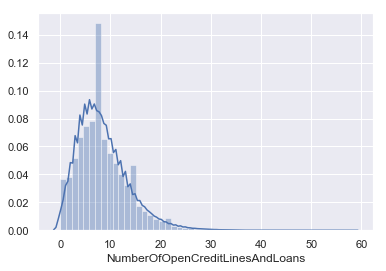

In [32]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])

the distribution indicate that it is continuous upto 30. Hence, let's cap at
	30

In [33]:
df.loc[df['NumberOfOpenCreditLinesAndLoans']>30, 'NumberOfOpenCreditLinesAndLoans']=30

In [34]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.438793
std           5.070728
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          30.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

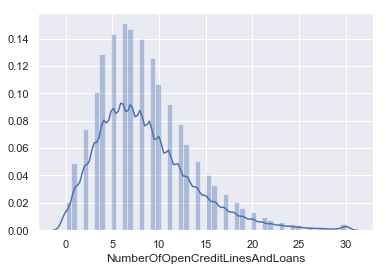

In [35]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])

## MonthlyIncome

In [36]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

There are missing values and Max value is too large. Min value of 0 is not ok as finance industry expect a minimum income of 1000.

In [37]:
df['MonthlyIncome'].isnull().sum()

29731

In [38]:
len(df[df['MonthlyIncome']<1000])

4428

Number of obs below 1000 is too large. hence, it is not ok to treat it as outliers and cap to 1000. Lets treat it as missing and then impute the values.

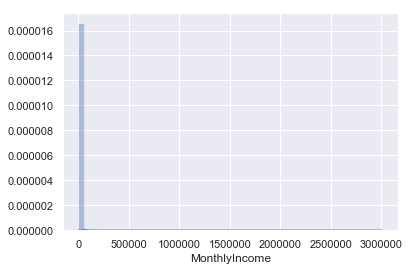

In [39]:
sns.distplot(df['MonthlyIncome'].dropna())

The max value is too large and hence the plot is not making sense

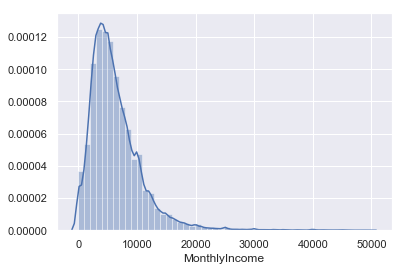

In [40]:
df2=df[df['MonthlyIncome']<50000]
sns.distplot(df2['MonthlyIncome'].dropna())

Distribution shows that income smoothly decreases upto 25000 and then few outliers 
of huge values. 

In [41]:
df.loc[df['MonthlyIncome']>25000, 'MonthlyIncome']=25000
df['MonthlyIncome'].describe()

count    120269.000000
mean       6349.112332
std        4358.376183
min           0.000000
25%        3400.000000
50%        5400.000000
75%        8249.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

In [42]:
df.loc[df['MonthlyIncome']<1000, 'MonthlyIncome']=np.NaN
df['MonthlyIncome'].describe()

count    115841.000000
mean       6579.317737
std        4275.154379
min        1000.000000
25%        3600.000000
50%        5513.000000
75%        8334.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

In [43]:
df['MonthlyIncome'].fillna(method='ffill', inplace=True)
df['MonthlyIncome'].describe()

count    150000.000000
mean       6578.107227
std        4286.321398
min        1000.000000
25%        3600.000000
50%        5500.000000
75%        8333.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

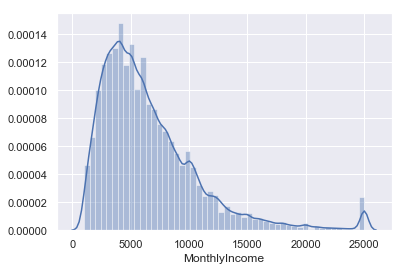

In [44]:
sns.distplot(df['MonthlyIncome'])

## NumberRealEstateLoansOrLines    

In [45]:
df['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

There are no missing values but max value is too large. Min value of 0 is ok.

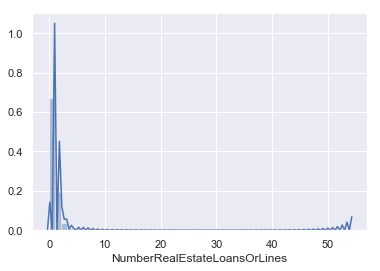

In [46]:
sns.distplot(df['NumberRealEstateLoansOrLines'])

Distribution shows that the variable smoothly decreases upto 10 and then few outliers of large values. 

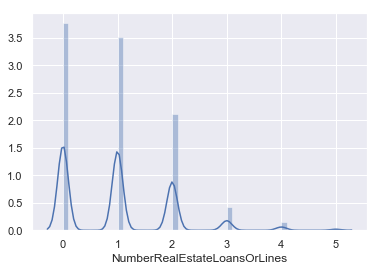

In [47]:
df2=df[df['NumberRealEstateLoansOrLines']<6]
sns.distplot(df2['NumberRealEstateLoansOrLines'].dropna())

In [48]:
df.loc[df['NumberRealEstateLoansOrLines']>5, 'NumberRealEstateLoansOrLines']=5
df['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.002480
std           1.020301
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

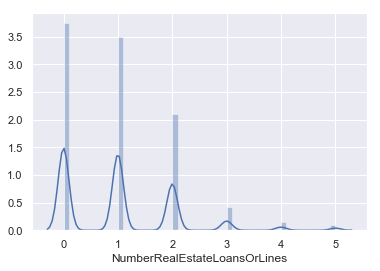

In [49]:
sns.distplot(df['NumberRealEstateLoansOrLines'])

### NumOfDependents

In [50]:
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

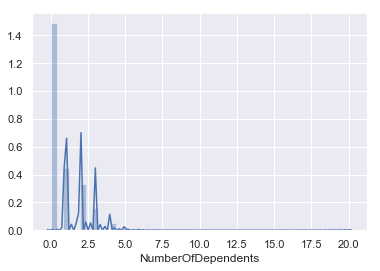

In [51]:
sns.distplot(df['NumberOfDependents'].dropna())

there are missing values. The distribution is continuous upto 5 and then few outliers

In [52]:
df.loc[df['NumberOfDependents']>5, 'NumberOfDependents']=5
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.754484
std           1.101288
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

Since proportion of missing is large, imputation using mean is not appropriate as this will change the distribution too much. we will impute the missing values using ffill as this will preserve the mean and standard deviation.

In [53]:
#df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean(), inplace=True)
df['NumberOfDependents'].fillna(method='ffill', inplace=True)
df['NumberOfDependents'].describe()

count    150000.000000
mean          0.754487
std           1.101377
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

In [54]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.303669,52.295207,0.303109,6578.107227,8.438793,1.002480,0.754487
std,43301.414527,0.249746,0.337852,14.771866,0.226290,4286.321398,5.070728,1.020301,1.101377
min,1.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.028578,41.000000,0.126122,3600.000000,5.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.144257,52.000000,0.274252,5500.000000,8.000000,1.000000,0.000000
75%,112500.250000,0.000000,0.520104,63.000000,0.438325,8333.000000,11.000000,2.000000,1.000000
max,150000.000000,1.000000,1.000000,109.000000,1.000000,25000.000000,30.000000,5.000000,5.000000


Looks like the data is now clean. Lets save it as .pkl file

In [55]:
df.to_pickle("gmsc_clean.pkl")

## Exploratory Data Analysis

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
sns.set(color_codes=True)

%matplotlib inline

In [57]:
df = pd.read_pickle('gmsc_clean.pkl')
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0
3,4,0,0.233810,30,0.036050,3300.0,5,0,0.0
4,5,0,0.907239,49,0.024926,25000.0,7,1,0.0


In [58]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.303669,52.295207,0.303109,6578.107227,8.438793,1.002480,0.754487
std,43301.414527,0.249746,0.337852,14.771866,0.226290,4286.321398,5.070728,1.020301,1.101377
min,1.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.028578,41.000000,0.126122,3600.000000,5.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.144257,52.000000,0.274252,5500.000000,8.000000,1.000000,0.000000
75%,112500.250000,0.000000,0.520104,63.000000,0.438325,8333.000000,11.000000,2.000000,1.000000
max,150000.000000,1.000000,1.000000,109.000000,1.000000,25000.000000,30.000000,5.000000,5.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(5)
memory usage: 10.3 MB


<h1 align="center">Univariate Analysis</h1> 

The objective of univariate analysis is to examine each of the variables one by one. The focus will be on the distribution of the variable. Let's start with dependent variable.

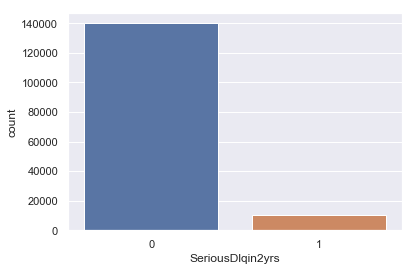

In [60]:
sns.countplot(x='SeriousDlqin2yrs', data=df)

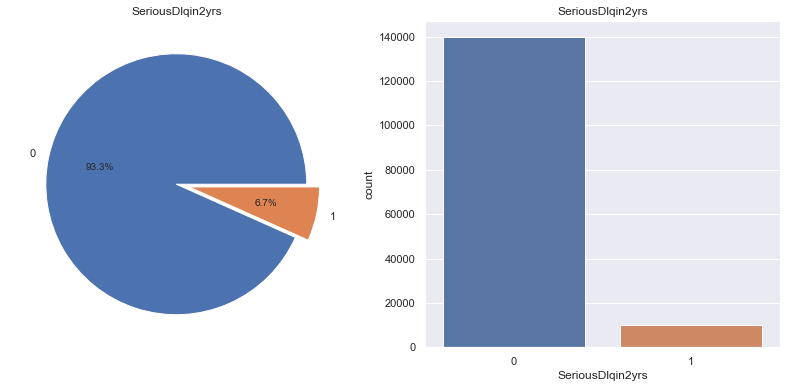

In [61]:
f,ax=plt.subplots(1,2,figsize=(14,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('SeriousDlqin2yrs')
ax[0].set_ylabel('')
sns.countplot('SeriousDlqin2yrs',data=df,ax=ax[1])
ax[1].set_title('SeriousDlqin2yrs')
plt.show()

About 6.7% customers were delinquents. 

Let's create distribution charts for all independent variables together.

RevolvingUtilizationOfUnsecuredLines


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


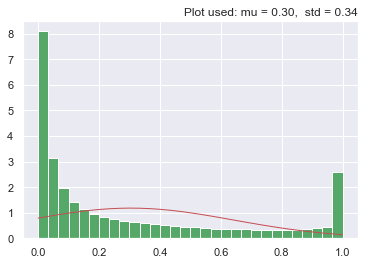

age


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


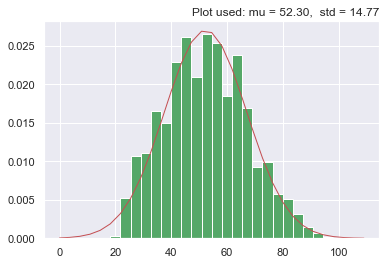

DebtRatio


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


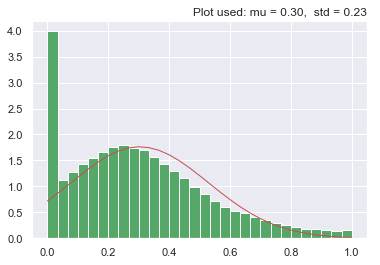

MonthlyIncome


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


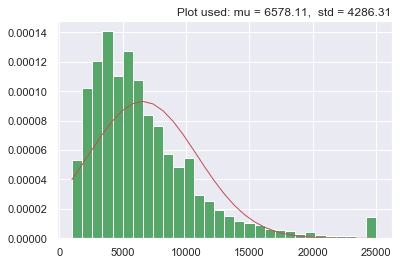

NumberOfOpenCreditLinesAndLoans


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


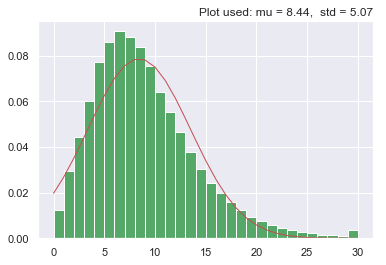

NumberRealEstateLoansOrLines


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


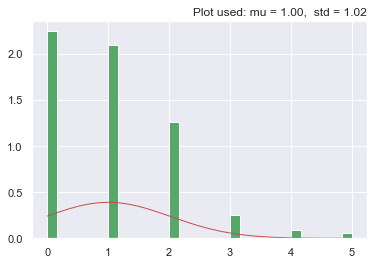

NumberOfDependents


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


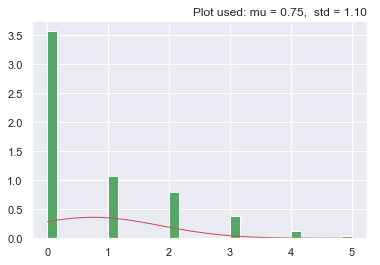

In [62]:
for column in df.columns[2:]:
    print(column)
    #s=df['column']
    s=df[column]
    mu, sigma =norm.fit(s)
    count, bins, ignored = plt.hist(s, 30, normed=True, color='g')
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1, color='r')

    title = "Plot used: mu = %.2f,  std = %.2f" % (mu, sigma)
    plt.title(title, loc='right')

    plt.show()

All these variables look fine. Although distribution of some of these variables are not close to a normal distribution, it is not very critical. The techniques we apply are not very sensitive to normality. We also have the option of converting some of these variables to categories for modeling (eg. RevolvingUtilizationOfUnsecuredLines). 


<h1 align="center">Bivariate Analysis</h1> 

Under bivariate analysis we will examine the realtionship between Dependent variable and each of the independent variables. We will also check selected pairs of independent variables.

## **SeriousDlqin2yrs vs RevolvingUtilizationOfUnsecuredLines** 

Easiest approach is to compare the means of RevolvingUtilizationOfUnsecuredL by two 
categories of SeriousDlqin2yrs

In [63]:
df.groupby('SeriousDlqin2yrs')['RevolvingUtilizationOfUnsecuredLines'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,0.282806
1,10026,0.594927


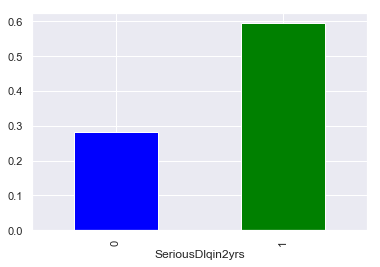

In [64]:
df['RevolvingUtilizationOfUnsecuredLines'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green']) 

As expected, delinquent customers got almost twice the utilization of unsecured lines

Let's now explore the relationship in detail by categorising the varaible. To categorise the variable, we will choose 25, 50 and 75 percentile as cutoffs.  

In [65]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [66]:
def cat_ruul(ruul):
    if ruul <0.03:
        return 1
    elif 0.03<= ruul <0.14:
        return 2
    elif 0.14<= ruul <0.52:
        return 3
    else:
        return 4

In [67]:
df['ruul_cat'] = df['RevolvingUtilizationOfUnsecuredLines'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4


In [68]:
# lets check if the categorization was done correctly
df.groupby('ruul_cat')['RevolvingUtilizationOfUnsecuredLines'].agg(['min','max'])

,min,max
ruul_cat,,
1,0.000000,0.030000
2,0.030006,0.139999
3,0.140022,0.519983
4,0.520023,1.000000


In [69]:
pd.crosstab(df.SeriousDlqin2yrs, df.ruul_cat, normalize='columns')

ruul_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.973692,0.972357,0.946664,0.84043
1,0.026308,0.027643,0.053336,0.15957


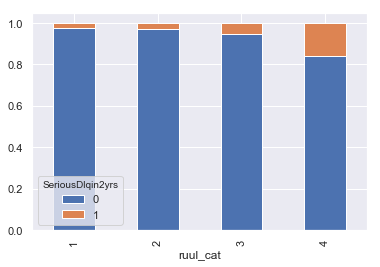

In [70]:
sb=pd.crosstab(df.ruul_cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

As expected, plot shows that there are more delinquents in the category of highest utilization. However there is not much difference between the fiirst two categories. 

In [71]:
df2=pd.crosstab(df.SeriousDlqin2yrs, df.ruul_cat)
chi2_contingency(df2)

(7177.181787116916,
 0.0,
 3,
 array([[35895.86572, 33386.59848, 35691.50368, 35000.03212],
        [ 2571.13428,  2391.40152,  2556.49632,  2506.96788]]))

Chi-square test establish that there is significant dependency between utilization and delinquency;


## **SeriousDlqin2yrs vs Age**

Easiest approach is to compare the means of Age by two categories of SeriousDlqin2yrs.

In [72]:
df.groupby('SeriousDlqin2yrs')['age'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,52.751375
1,10026,45.926591


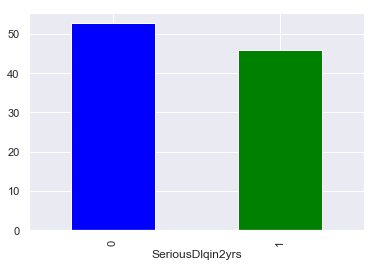

In [73]:
df['age'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green']) 

Delinquent cusomters are younger than non-delinquent customers.

let's now explore the relationship in detail by categorising age. To categorise the variable, we will choose 25, 50 and 75 percentile as cutoffs.  

In [74]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [75]:
def cat_ruul(ruul):
    if ruul <41:
        return 1
    elif 41<= ruul <52:
        return 2
    elif 52<= ruul <63:
        return 3
    else:
        return 4

In [76]:
df['age_cat'] = df['age'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1


In [77]:
# lets check if the categorization was done correctly
df.groupby('age_cat')['age'].agg(['min','max'])

,min,max
age_cat,,
1,0,40
2,41,51
3,52,62
4,63,109


In [78]:
pd.crosstab(df.SeriousDlqin2yrs, df.age_cat, normalize='columns')

age_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.896458,0.918115,0.942146,0.973347
1,0.103542,0.081885,0.057854,0.026653


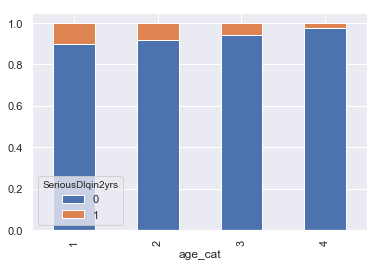

In [79]:
sb=pd.crosstab(df.age_cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

Plot shows that there are more proportion of delinquents in the category of youngest age. Delinquency decreases as age increases uniformly. 

In [80]:
df2=pd.crosstab(df.SeriousDlqin2yrs, df.age_cat)
chi2_contingency(df2)

(1930.9900919630384,
 0.0,
 3,
 array([[32751.11652, 36079.69824, 35711.10004, 35432.0852 ],
        [ 2345.88348,  2584.30176,  2557.89996,  2537.9148 ]]))

chi-square test establish that there is significant dependency between age and delinquency;


## **SeriousDlqin2yrs vs DebtRatio** 

Easiest approach is to compare the means of DebtRatio by two 
categories of SeriousDlqin2yrs

In [81]:
df.groupby('SeriousDlqin2yrs')['DebtRatio'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,0.300645
1,10026,0.337519


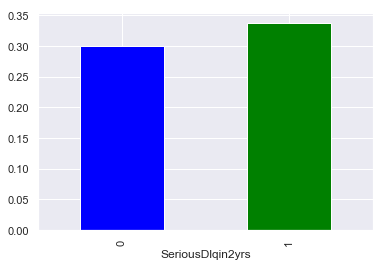

In [82]:
df['DebtRatio'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green']) 

Delinquent customers got higher debtratio compared to non-delinquent customers.

let's now explore the relationship in detail by categorising DebtRatio. To categorise the variable, we will choose 25, 50 and 75 percentile as cutoffs.  

In [83]:
df['DebtRatio'].describe()

count    150000.000000
mean          0.303109
std           0.226290
min           0.000000
25%           0.126122
50%           0.274252
75%           0.438325
max           1.000000
Name: DebtRatio, dtype: float64

In [84]:
def cat_ruul(ruul):
    if ruul <0.13:
        return 1
    elif 0.13<= ruul <0.27:
        return 2
    elif 0.27<= ruul <0.43:
        return 3
    else:
        return 4

In [85]:
df['DebtRatio_cat'] = df['DebtRatio'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1


In [86]:
# lets check if the categorization was done correctly
df.groupby('DebtRatio_cat')['DebtRatio'].agg(['min','max'])

,min,max
DebtRatio_cat,,
1,0.000000,0.129995
2,0.130008,0.269990
3,0.270009,0.429991
4,0.430011,1.000000


In [87]:
pd.crosstab(df.SeriousDlqin2yrs, df.DebtRatio_cat, normalize='columns')

DebtRatio_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.939219,0.939605,0.938991,0.915813
1,0.060781,0.060395,0.061009,0.084187


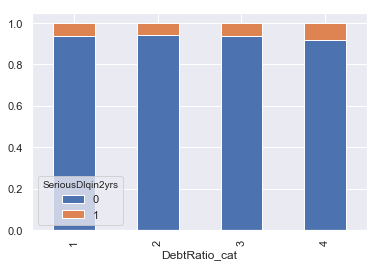

In [88]:
sb=pd.crosstab(df.DebtRatio_cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

As expected it shows that there are more delinquents in the category of 
highest DebtRatio.

In [89]:
df2=pd.crosstab(df.SeriousDlqin2yrs, df.DebtRatio_cat)
chi2_contingency(df2)

(254.86642993657873,
 5.7976020035809566e-55,
 3,
 array([[35726.0306 , 33219.56284, 34582.9096 , 36445.49696],
        [ 2558.9694 ,  2379.43716,  2477.0904 ,  2610.50304]]))

Chi-square test establish that there is significant dependency between DebtRatio and delinquency.


## **SeriousDlqin2yrs vs MonthlyIncome** 

Simplest approach is to compare the means of MonthlyIncome by two 
categories of SeriousDlqin2yrs

In [90]:
df.groupby('SeriousDlqin2yrs')['MonthlyIncome'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,6635.519196
1,10026,5776.572910


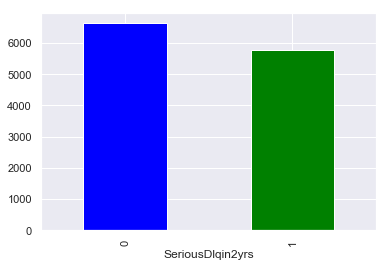

In [91]:
df['MonthlyIncome'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green']) 

Delinquent cusomters got lower MonthlyIncome compared to non-delinquent customers.

let's now explore the relationship in detail by categorising MonthlyIncome. To categorise the variable, we will choose 25, 50 and 75 percentile as cutoffs.  

In [92]:
df['MonthlyIncome'].describe()

count    150000.000000
mean       6578.107227
std        4286.321398
min        1000.000000
25%        3600.000000
50%        5500.000000
75%        8333.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

In [93]:
def cat_ruul(ruul):
    if ruul <3600:
        return 1
    elif 3600<= ruul <5500:
        return 2
    elif 5500<= ruul <8333:
        return 3
    else:
        return 4

In [94]:
df['MonthlyIncome_cat'] = df['MonthlyIncome'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat,MonthlyIncome_cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1,1


In [95]:
# lets check if the categorization was done correctly
df.groupby('MonthlyIncome_cat')['MonthlyIncome'].agg(['min','max'])

,min,max
MonthlyIncome_cat,,
1,1000.0,3599.0
2,3600.0,5499.0
3,5500.0,8332.0
4,8333.0,25000.0


In [96]:
pd.crosstab(df.SeriousDlqin2yrs, df.MonthlyIncome_cat, normalize='columns')

MonthlyIncome_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.912834,0.926565,0.940627,0.951984
1,0.087166,0.073435,0.059373,0.048016


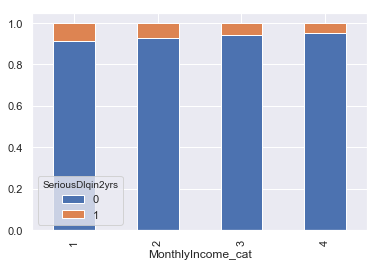

In [97]:
sb=pd.crosstab(df.MonthlyIncome_cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

As expected it shows that there are less delinquents in the category of 
highest MonthlyIncome.

In [98]:
df2=pd.crosstab(df.SeriousDlqin2yrs, df.MonthlyIncome_cat)
chi2_contingency(df2)

(524.3515592410665,
 2.518157324733066e-113,
 3,
 array([[34974.8368 , 33953.95976, 35441.4168 , 35603.78664],
        [ 2505.1632 ,  2432.04024,  2538.5832 ,  2550.21336]]))

Chi-square test establish that there is significant dependency between MonthlyIncome and delinquency;


## **SeriousDlqin2yrs vs NumberOfOpenCreditLinesAndLoans **

Simplest approach is to compare the means of NumberOfOpenCreditLinesAndLoans by two 
categories of SeriousDlqin2yrs

In [99]:
df.groupby('SeriousDlqin2yrs')['NumberOfOpenCreditLinesAndLoans'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,8.480196
1,10026,7.860762


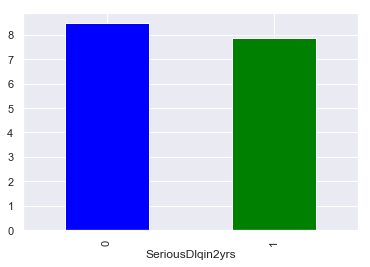

In [100]:
df['NumberOfOpenCreditLinesAndLoans'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green']) 

Delinquent cusomters got lower NumberOfOpenCreditLinesAndLoans compared to non-delinquent customers.

let's now explore the relationship in detail by categorising NumberOfOpenCreditLinesAndLoans. To categorise the variable, we will choose 25, 50 and 75 percentile as cutoffs.  

In [101]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.438793
std           5.070728
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          30.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [102]:
def cat_ruul(ruul):
    if ruul <5:
        return 1
    elif 5<= ruul <8:
        return 2
    elif 8<= ruul <11:
        return 3
    else:
        return 4

In [103]:
df['NOCLL_Cat'] = df['NumberOfOpenCreditLinesAndLoans'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat,MonthlyIncome_cat,NOCLL_Cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4,4,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1,1,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1,1,1


In [104]:
# lets check if the categorization was done correctly
df.groupby('NOCLL_Cat')['NumberOfOpenCreditLinesAndLoans'].agg(['min','max'])

,min,max
NOCLL_Cat,,
1,0,4
2,5,7
3,8,10
4,11,30


In [105]:
pd.crosstab(df.SeriousDlqin2yrs, df.NOCLL_Cat, normalize='columns')

NOCLL_Cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.907811,0.941694,0.945023,0.935852
1,0.092189,0.058306,0.054977,0.064148


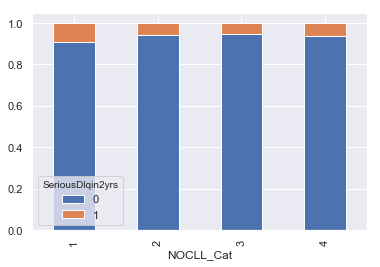

In [106]:
sb=pd.crosstab(df.NOCLL_Cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

As expected it shows that there are more delinquents in the category of 
lowest NumberOfOpenCreditLinesAndLoans.

In [107]:
df2=pd.crosstab(df.SeriousDlqin2yrs, df.NOCLL_Cat)
chi2_contingency(df2)

(473.89910137342736,
 2.1617934485230027e-102,
 3,
 array([[31409.23244, 37130.4364 , 31299.11956, 40135.2116 ],
        [ 2249.76756,  2659.5636 ,  2241.88044,  2874.7884 ]]))

Chi-square test establish that there is significant dependency between NumberOfOpenCreditLinesAndLoans and delinquency;


### **SeriousDlqin2yrs vs NumberRealEstateLoansOrLines** 

Simplest approach is to compare the means of NumberRealEstateLoansOrLines by two 
categories of SeriousDlqin2yrs

In [108]:
df.groupby('SeriousDlqin2yrs')['NumberRealEstateLoansOrLines'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,1.006808
1,10026,0.942051


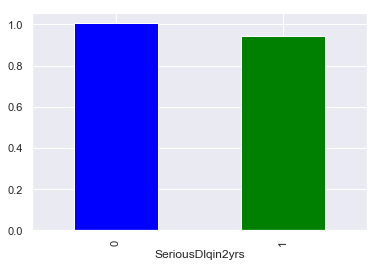

In [109]:
df['NumberRealEstateLoansOrLines'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green']) 

Delinquent cusomters got lower NumberRealEstateLoansOrLines compared to non-delinquent customers.

let's now explore the relationship in detail by categorising NumberRealEstateLoansOrLines. To categorise the variable, we will choose 25, 50 and 75 percentile as cutoffs.  

In [110]:
df['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.002480
std           1.020301
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [111]:
def cat_ruul(ruul):
    if ruul <=0:
        return 1
    elif 0< ruul <=1:
        return 2
    elif 1< ruul <=2:
        return 3
    else:
        return 4

In [112]:
df['NRELL_Cat'] = df['NumberRealEstateLoansOrLines'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat,MonthlyIncome_cat,NOCLL_Cat,NRELL_Cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4,4,4,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1,1,1,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1,1,1,1


In [113]:
# lets check if the categorization was done correctly
df.groupby('NRELL_Cat')['NumberRealEstateLoansOrLines'].agg(['min','max'])

,min,max
NRELL_Cat,,
1,0,0
2,1,1
3,2,2
4,3,5


In [114]:
pd.crosstab(df.SeriousDlqin2yrs, df.NRELL_Cat, normalize='columns')

NRELL_Cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.916851,0.947495,0.944007,0.915494
1,0.083149,0.052505,0.055993,0.084506


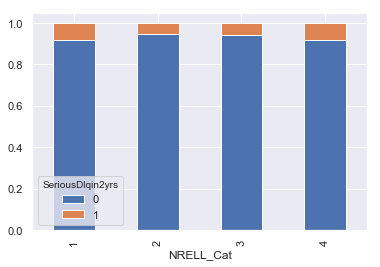

In [115]:
sb=pd.crosstab(df.NRELL_Cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

As expected it shows that there are more delinquents in the category of 
lowest NumberRealEstateLoansOrLines.

In [116]:
df2=pd.crosstab(df.SeriousDlqin2yrs, df.NRELL_Cat)
chi2_contingency(df2)

(521.3188180426857,
 1.1438773309834148e-112,
 3,
 array([[52432.39408, 48839.72808, 29415.06952,  9286.80832],
        [ 3755.60592,  3498.27192,  2106.93048,   665.19168]]))

chi-square test establish that there is significant dependency between NumberRealEstateLoansOrLines and delinquency;


## SeriousDlqin2yrs vs NumberOfDependents 

Simplest approach is to compare the means of NumberOfDependents by two 
categories of SeriousDlqin2yrs

In [117]:
df.groupby('SeriousDlqin2yrs')['NumberOfDependents'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,0.741159
1,10026,0.940555


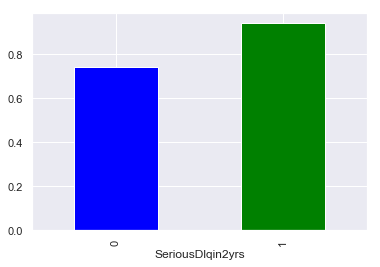

In [118]:
df['NumberOfDependents'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green']) 

Delinquent cusomters got higher NumberOfDependents compared to non-delinquent customers.

let's now explore the relationship in detail by categorising NumberOfDependents. To categorise the variable, we will choose 25, 50 and 75 percentile as cutoffs.  

In [119]:
df['NumberOfDependents'].describe()

count    150000.000000
mean          0.754487
std           1.101377
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

In [120]:
def cat_ruul(ruul):
    if ruul <=0:
        return 1
    elif 0< ruul <=1:
        return 2
    elif 1< ruul <=2:
        return 3
    else:
        return 4

In [121]:
df['NOD_Cat'] = df['NumberOfDependents'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat,MonthlyIncome_cat,NOCLL_Cat,NRELL_Cat,NOD_Cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4,4,4,4,3
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1,1,1,1,2
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1,1,1,1,1


In [122]:
# lets check if the categorization was done correctly
df.groupby('NOD_Cat')['NumberOfDependents'].agg(['min','max'])

,min,max
NOD_Cat,,
1,0.0,0.0
2,1.0,1.0
3,2.0,2.0
4,3.0,5.0


In [123]:
pd.crosstab(df.SeriousDlqin2yrs, df.NOD_Cat, normalize='columns')

NOD_Cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.941697,0.92732,0.919681,0.908779
1,0.058303,0.07268,0.080319,0.091221


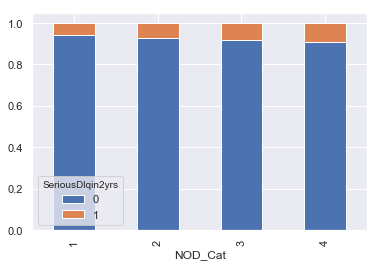

In [124]:
sb=pd.crosstab(df.NOD_Cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

As expected it shows that there are more delinquents in the category of 
highest NumberOfDependents.

In [125]:
df2=pd.crosstab(df.SeriousDlqin2yrs, df.NOD_Cat)
chi2_contingency(df2)

(307.8359012512757,
 2.0034894537531076e-66,
 3,
 array([[83260.26784, 25241.978  , 18705.1922 , 12766.56196],
        [ 5963.73216,  1808.022  ,  1339.8078 ,   914.43804]]))

chi-square test establish that there is significant dependency between NumberOfDependents and delinquency;


This discussion provided an overview of EDA. Ideally this should result in a professional presentation. The Charts created can be copied and pasted into the presentation software or the summarised values can be used to create charts. Each of this analyses should be supported with conclusions.